# Projet 3: Sparcité, estimation et selection de variables
Réalisé par :
Djamila AZZOUZ
RAZAFIMANDIMBY Henimpitahiana
Etudiantes en Master 2 probabilités et statistiques des nouvelles données.

In [220]:
#Importation des bibliothèques nécessaires pour la réalisation du projet:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numpy.random as random

## Excercice 1: Différentes méthodes de seuillage:

In [223]:
##### Initialisation des variables 
d=50
Beta=0.3
to=np.sqrt(2*np.log(d))
a=2
#Construction des étaji qui appartiennent à {0,1}
#création d'un vecteur rempli de zéro:
étajsum= d**(1-Beta)
patie_entière=int(étajsum) #int(étajsum) c'est sa partie entière
nul= np.zeros(d-patie_entière) # vecteur rempli de zeros
##création d'un vecteur rempli de un:
unvect= np.ones(int(étajsum))#vecteur rempli de 1
#définition de notre étaji
étaji= np.concatenate((nul, unvect), axis=None)
#Mettre les étaji dans une liste
étaji=list(étaji)
#Mélange le contenu de notre liste pour cela on utilise random.shuffle
np.random.shuffle(étaji) 
print(len(étaji))
#Géneration de ksi selon une loi normale(0,1)
ksi=np.random.standard_normal(d)

50


Question 1: Définition des différents seuillages

Text(0.5, 1.0, "Fonction de l'estimateur par seuillage dur")

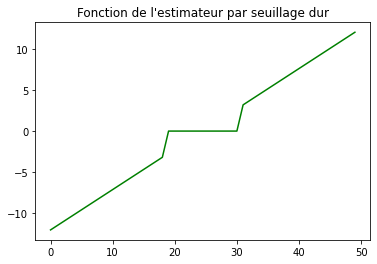

In [224]:
# Définition de la fonction de l'estimateur par seuillage dur:
x=np.linspace(-12,12,d)
def fun_estim_H(z,to):
    estim1= z*(np.abs(z)>to)
    return estim1
#Représentation graphique de la fonction définie:
plt.plot(fun_estim_H(x,to),c='green')
plt.title('Fonction de l\'estimateur par seuillage dur')


Text(0.5, 1.0, "Fonction de l'estimateur par seuillage faible")

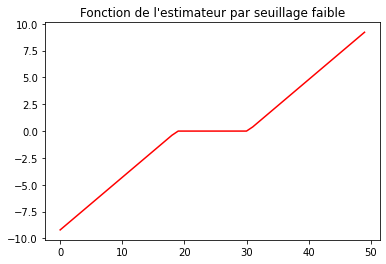

In [225]:
# Définition de la fonction de l'estimateur par seuillage faible:
x=np.linspace(-12,12,d)
def fun_estim_S(z,to):
    estim2 = z*np.maximum(1-(to/abs(z)),np.zeros(d))
    return estim2
#Représentation graphique de la fonction définie:
plt.plot(fun_estim_S(x,to),c='r')
plt.title('Fonction de l\'estimateur par seuillage faible')


Text(0.5, 1.0, "Fonction de l'estimateur par seuillage non-negative garrotte")

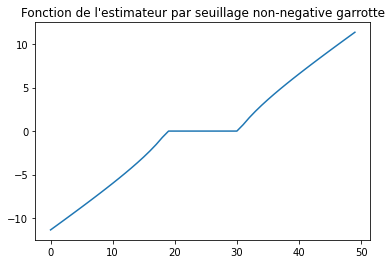

In [226]:
#Fonction de l'estimateur par seuillage non négative garrotte:
x=np.linspace(-12,12,d)
def fun_estim_NG(z,to):
    estim3 = z*np.maximum(1-((to**2)/(z**2)),np.zeros(d))
    return estim3
plt.plot(fun_estim_NG(x,to))
plt.title('Fonction de l\'estimateur par seuillage non-negative garrotte')

In [228]:
#Superposition des trois  graphiques:
x=np.linspace(-12,12,d)
Y1=[fun_estim_H(i,to) for i in x]
Y2=[fun_estim_S(i,to) for i in x]
Y3=[fun_estim_NG(i,to) for i in x]

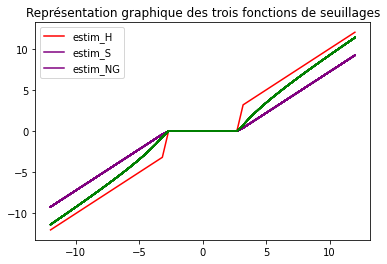

In [229]:
plt.plot(x,Y1,c='r')
plt.plot(x,Y2,c='purple')
plt.plot(x,Y3,c='green')
plt.title("Représentation graphique des trois fonctions de seuillages")
plt.gca().legend(('estim_H', 'estim_S', 'estim_NG'))
plt.show()

## Calcul du risque quadratique de l'estimateur par différents seuillages pour tout a allons de 1 à 10


Question 2:

In [230]:
#Définition de la fonction du risque quadratique:
def Risquequad(thetachap,a):
    thetaét=np.zeros(d)
    for i in range(d):
        thetaét[i]= a*étaji[i]
    return sum(abs(thetachap-thetaét)**2)
#Calcul du risque quadratique de l'estimateur du seuillage dur theta_Hj:
n=10
a=np.linspace(1,10,n) #on va varier de 1 à 10
y=[np.zeros(d) for i in range(n)]
risque_H= np.zeros(n)
theta_Hj=[np.zeros(d) for i in range(n)]        
for j in range(n):
    for i in range(d):
        y[j][i]=a[j]*étaji[i]+ksi[i]
    theta_Hj[j]=fun_estim_H(y[j],to)
    risque_H[j] = Risquequad(theta_Hj[j],a[j])


In [231]:
#Calcul de l'écart type  et la moyenne pur le risque_H:
ecart_type_H= np.std(risque_H)
moyenne_H=np.mean(risque_H)
print('ecart type du risque_H=',ecart_type_H)
print(' moyenne du risque_H=',moyenne_H)

ecart type du risque_H= 19.51414444613986
 moyenne du risque_H= 24.938188384276675


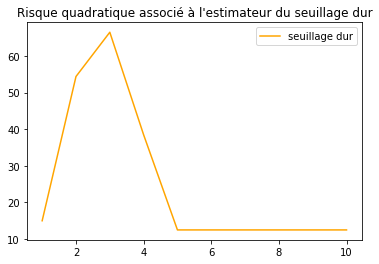

In [232]:
#Représentation graphique du risque quadratique associé au seuillage dur:
x=a
plt.plot(x,risque_H,c='orange',label='seuillage dur')
plt.title('Risque quadratique associé à l\'estimateur du seuillage dur')
plt.legend()
plt.show()

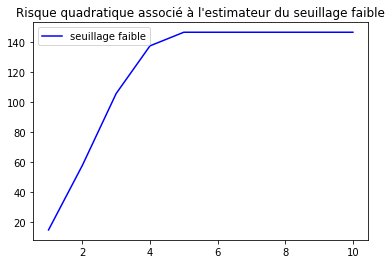

In [233]:
#Calcul du risque quadratique  associé à l'estimateur du seuillage faible theta_Sj:
risque_S= np.zeros(n)
theta_Sj=[np.zeros(d) for i in range(n)]
for j in range(n):
    theta_Sj[j]= fun_estim_S(y[j],to)
    risque_S[j] = Risquequad(theta_Sj[j],a[j])
#Représentation graphique du risque quadratique associé au seuillage faible:
plt.plot(x,risque_S,c='blue',label='seuillage faible')
plt.legend()
plt.title('Risque quadratique associé à l\'estimateur du seuillage faible')
plt.show()          

In [234]:
#Calcul de l'écart type  et la moyenne pour le risque_Sj:
ecart_type_S= np.std(risque_S)
moyenne_S=np.mean(risque_S)
print('ecart type du risque_Sj=',ecart_type_S)
print('moyenne du risque_Sj=',moyenne_S)

ecart type du risque_Sj= 44.22662868352009
moyenne du risque_Sj= 119.41444217108145


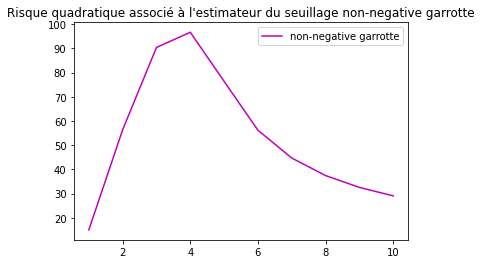

In [235]:
#Calcul du risque quadratique  associé à l'estimateur du seuillage faible theta_NG:
risque_NG= np.zeros(n)
theta_NGj=[np.zeros(d) for i in range(n)]
for j in range(n):
    theta_NGj[j]= fun_estim_NG(y[j],to)
    risque_NG[j] = Risquequad(theta_NGj[j],a[j])
#Représentation graphique du risque quadratique associé au seuillage non-negative garrotte:
plt.plot(x,risque_NG,c='m',label='non-negative garrotte')
plt.legend()
plt.title('Risque quadratique associé à l\'estimateur du seuillage non-negative garrotte')
plt.show()  

In [236]:
#Calcul de l'écart type  et la moyenne pour le risque NG:
ecart_type_NG= np.std(risque_NG)
moyenne_NG=np.mean(risque_NG)
print('ecart type du risque_NG=',ecart_type_NG)
print('moyenne du risque_NG=',moyenne_NG)


ecart type du risque_NG= 25.713381619315985
moyenne du risque_NG= 53.47108423951089


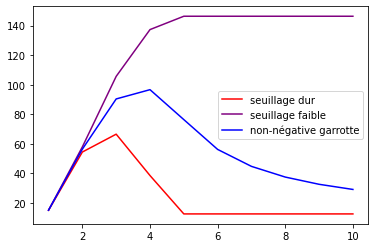

In [237]:
#Superposition des graphiques:
plt.plot(x,risque_H,c='r',label='seuillage dur')
plt.plot(x,risque_S,c='purple',label='seuillage faible')
plt.plot(x,risque_NG,c='blue',label='non-négative garrotte')
plt.legend()
plt.show()


Question 3: Sélection de variables du modèle MSG

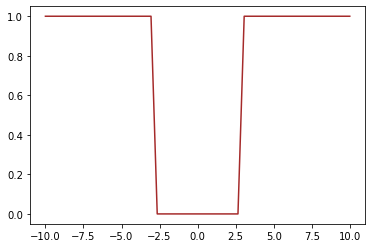

In [204]:
#Définition d'une fonction qui nous calcule étaji_chap
x=np.linspace(-10,10,d)
def fun_etaji_et(z,to):
    estim4= np.abs(z)>=to
    return estim4
#Représentation graphique la fonction fun_etaji_et:
Y4=[fun_etaji_et(i,to) for i in x]
plt.plot(x,Y4,c='brown')


## Sélection des coordoonées non nuls du vecteur theta_j_etoile:

In [205]:
etaji_chap=[np.zeros(d) for i in range(n)]
risque_MS=[np.zeros(d) for i in range(n)]
for j in range(n):
    etaji_chap[j]=fun_etaji_et(y[j],to)
    risque_MS[j] =sum(abs(étaji-etaji_chap[j]))
print('la valeur du risque de selection de variables =',risque_MS)
ecart_type_MS=np.std(risque_MS)
moyenne_MS=np.mean(risque_MS)
print('ecart type du risque_MS =' ,ecart_type_MS)
print('moyenne du risque_MS =', moyenne_MS)


la valeur du risque de selection de variables = [15.0, 15.0, 9.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
ecart type du risque_MS = 6.057227088363124
moyenne du risque_MS = 4.1


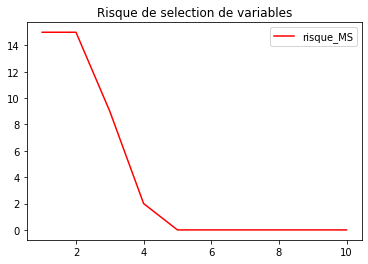

In [206]:
#Représentation graphique du risque de selection de variables:
x=a
plt.plot(x,risque_MS,c='red',label='risque_MS')
plt.legend()
plt.title('Risque de selection de variables')
plt.show() 

## Excercie 2: Detection de ruptures du signal

### Etape 1: Définition des theta_etoilej:

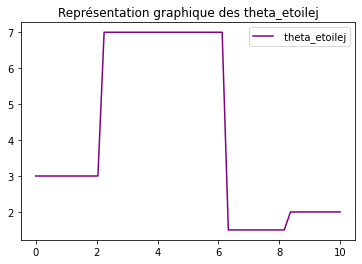

In [207]:
#Création du vecteur theta_etoile:
t_et1=[3]*11
t_et2=[7]*20
t_et3=[1.5]*10
t_et4=[2]*(d-41)
#Concatenation des t_et pour obtenir theta_etoile:
theta_etj= np.concatenate((t_et1,t_et2,t_et3,t_et4),axis=None)
#Vérification de la taille de theta_etoile:
len(theta_etj)
#Représentation graphique des theta_etoilesj:
X=np.linspace(0,10,d)
Y=theta_etj
plt.plot(X,Y,c='purple',label=' theta_etoilej')
plt.legend()
plt.title('Représentation graphique des theta_etoilej')
plt.show()

### Etape 2: Définition du modèle de suite gaussienne(MSG)

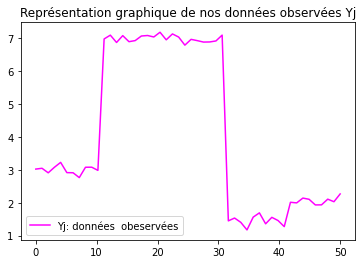

In [208]:
epsilon=1/np.sqrt(d)
#Construction de notre modèle MSG:
Yj=[0]*d
for i in range(d):
    Yj[i]=theta_etj[i]+(epsilon*ksi[i])
#Vérification de la taille de Yj:
X1=np.linspace(0,50,d)
Y1=Yj
#Représentation graphique de nos données observées:
plt.plot(X1,Y1,c='magenta', label='Yj: données  obeservées')
plt.title('Représentation graphique de nos données observées Yj')
plt.legend()
plt.show()


### Etape 3: Construction de notre vecteur sparce, et définition de notre vecteur de detection de ruptures 

49


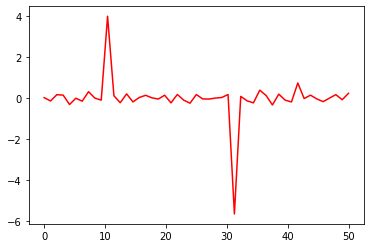

In [209]:
#Construction de delta_etoilej:
delta_et=[0]*(d-1)
for j in range(d-1):
    delta_et[j]=Yj[j+1]-Yj[j]
#Vérification de la taille de delta_etoilej:
print(len(delta_et))
#Représentation graphique de delta_etoilej:
X2=np.linspace(0,50,d-1)
Y2= delta_et
plt.plot(X2,Y2,c='r')
plt.show()

Comme l'ensemble de sparcité est défini comme suit:
J*={j in (1,...d) delta_etoilej !=0}
Donc pour estimer cet ensemble il suffit d'estimer delta_etoilej 
On note donc:
J*_chap={j in (1,...d) delta_etoilej_chap !=0}

### Etape 4: Estimation de notre vecteur de detection de ruptures par le seuillage dur

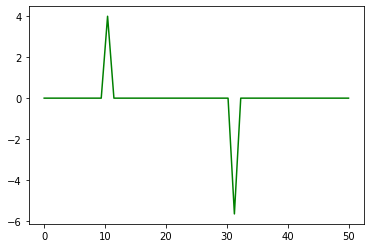

[0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, -0.0, 3.9996998811115754, 0.0, -0.0, 0.0, -0.0, 0.0, 0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, -0.0, 0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -5.653293766191787, 0.0, -0.0, -0.0, 0.0, 0.0, -0.0, 0.0, -0.0, -0.0, 0.0, -0.0, 0.0, -0.0, -0.0, 0.0, 0.0, -0.0, 0.0]


In [210]:
#Estimation de delta_etoile par seuillage dur pour la détection des lieux de  ruptures:
delta_chap=[0]*(d-1)
for i in range(d-1):
    delta_chap[i]=fun_estim_H(delta_et[i],to)
X3=np.linspace(0,50,d-1)
Y3= delta_chap
plt.plot(X3,Y3,c='green')
plt.show()
print(delta_chap)

Donc l'ensemble de sparcité de J_chap est :
J_chap=[10,30]
et card(J_chap)=2

### Excercice 3: Application sur des données d'émission de Co2 et de polluants des véhicules commercialisés en France pour l'année 2014:

#### Nous allons appliquer les étapes que nous avons définit dans l'excercice 2 pour detecter les lieux de  ruptures du signal :

In [211]:
#Importation du dataset:
co2=pd.read_csv('co2data.csv')
df=co2.head(50)


In [212]:
#Récupération de nos données réelles Y:
Y=np.array(df['conso_mixte'])
#Affichage de la taille de notre Y:
len(Y)

50

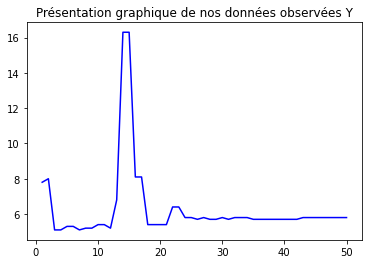

In [213]:
M=50
#Présentation graphique de nos données observées
X4=np.linspace(1,50,M)
plt.plot(X4,Y,c='blue')
plt.title('Présentation graphique de nos données observées Y')
plt.show()

##### Maintenant que nous avons definit nos observations Y, nous allons utiliser le codes définis précédemment pour detecter nos ruptures.

49


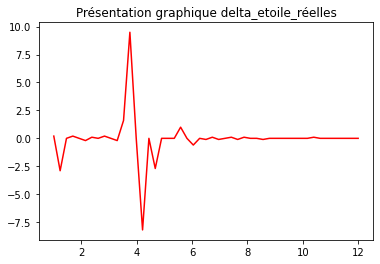

In [214]:
#Construction de delta_etoile_réelle:
delta_et_réel=[0]*(M-1)
for j in range(M-1):
    delta_et_réel[j]=Y[j+1]-Y[j]
#Vérification de la taille de delta_etoilej:
print(len(delta_et_réel))
#Représentation graphique de delta_etoilej:
X5=np.linspace(1,12,M-1) #sur l'axe des abcisses ce sont les mois
Y5= delta_et_réel
plt.plot(X5,Y5,c='r')
plt.title('Présentation graphique delta_etoile_réelles')
plt.show()

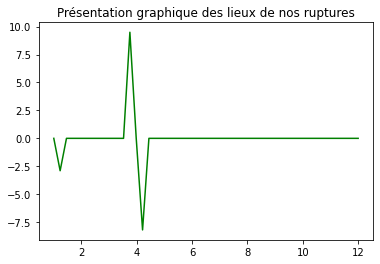

In [215]:
#Eestimation de delta_etoile par seuillage dur pour la détection des lieux de  ruptures:
delta_chap_réel=[0]*(M-1)
for i in range(M-1):
    delta_chap_réel[i]=fun_estim_H(delta_et_réel[i],to)
X6=np.linspace(1,12,M-1) #detecte les mois
Y6= delta_chap_réel
plt.plot(X6,Y6,c='green')
plt.title('Présentation graphique des lieux de nos ruptures')
plt.show()


In [216]:
print(delta_chap_réel)

[0.0, -2.900000095, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 9.499999049, 0.0, -8.199998858999999, 0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, 0.0, -0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


### On augmente l'échantillon à 300 et on refait la même chose: 

In [217]:
#Augmentation de l'échantillon:
df1=co2.head(300)
#Récupération de nos données réelles Y:
Y_1=np.array(df1['conso_mixte'])
#Affichage de la taille de notre Y:
len(Y_1)

300

299


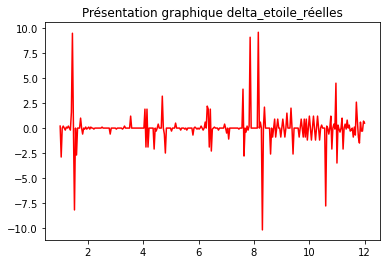

In [218]:
M=300
to1=np.sqrt(2*np.log(M))
#Construction de delta_etoile_réelle:
delta_et_réel=[0]*(M-1)
for j in range(M-1):
    delta_et_réel[j]=Y_1[j+1]-Y_1[j]
#Vérification de la taille de delta_etoilej:
print(len(delta_et_réel))
#Représentation graphique de delta_etoilej:
X7=np.linspace(1,12,M-1) #sur l'axe des abcisses ce sont les mois
Y7= delta_et_réel
plt.plot(X7,Y7,c='r')
plt.title('Présentation graphique delta_etoile_réelles')
plt.show()

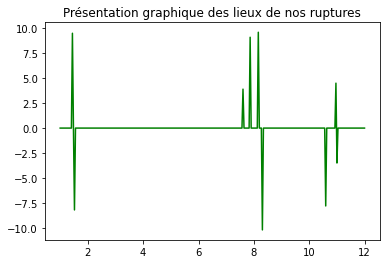

In [219]:
#Eestimation de delta_etoile par seuillage dur pour la détection des lieux de  ruptures:
delta_chap_réel=[0]*(M-1)
for i in range(M-1):
    delta_chap_réel[i]=fun_estim_H(delta_et_réel[i],to1)
X6=np.linspace(1,12,M-1) #detecte les mois
Y6= delta_chap_réel
plt.plot(X6,Y6,c='green')
plt.title('Présentation graphique des lieux de nos ruptures')
plt.show()
